<a href="https://colab.research.google.com/github/TonioFlag/Teoria-de-Colas-y-Simulacion/blob/main/Caso-1/Analisis-de-salida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import re

df = pd.read_excel("Resultados_Simulacion.xlsx", sheet_name = "ReasignacionBloque8")
def limpiar_fecha(fecha):
    if pd.isna(fecha):
        return None
    fecha = re.sub(r'\s+a\.\s*m\.', ' AM', fecha)
    fecha = re.sub(r'\s+p\.\s*m\.', ' PM', fecha)
    return pd.to_datetime(fecha, format="%d/%m/%Y %I:%M:%S %p", errors='coerce')

# Convertir columnas de fecha a formato datetime
cols_fecha = ["Hora Arribo", "TPF1", "TP2", "TPF2", "TP3", "TPF3", "TP4", "TPF4"]
for col in cols_fecha:
    df[col] = df[col].apply(limpiar_fecha)

df["TiempoA"] = df["Hora Arribo"].diff().dt.total_seconds() / 3600
df["Tiempo1"] = (df["TPF1"] - df["Hora Arribo"]).dt.total_seconds() / 3600
df["Tiempo2"] = (df["TPF2"] - df["TPF1"]).dt.total_seconds() / 3600
df["Tiempo3"] = (df["TPF3"] - df["TPF2"]).dt.total_seconds() / 3600
df["Tiempo4"] = (df["TPF4"] - df["TPF3"]).dt.total_seconds() / 3600
tiempo_total_simulacion = 720

In [ ]:
resultados = []

# Iterar sobre cada tipo de recurso (ambulancias, bomberos, patrulleros)
for recurso in ["Amb", "Bomb", "Patr"]:
    # Obtener lista de servidores únicos en esa categoría
    servidores = df[recurso].dropna().unique()

    for servidor in servidores:
        filtro = df[df[recurso] == servidor]

        tiempo_total_servidor = filtro[['Tiempo2', 'Tiempo3','Tiempo4']].sum().sum()

        # Evitar división por cero
        if tiempo_total_simulacion == 0:
            continue

        # Calcular el porcentaje de ocupación
        ocupacion = tiempo_total_servidor / tiempo_total_simulacion

        # Calcular el porcentaje de ocio
        ocio = 1 - ocupacion

        # Guardar en la lista de resultados
        resultados.append({
            "Servidor": servidor,
            "Tipo": recurso,
            "Ocupación (%)": ocupacion * 100,
            "Ocio (%)": ocio * 100
        })

# Convertir resultados en un DataFrame
df_resultados = pd.DataFrame(resultados)

print(df_resultados)

   Servidor  Tipo  Ocupación (%)    Ocio (%)
0      MM11   Amb     294.575463 -194.575463
1      MA11   Amb     256.337770 -156.337770
2      MM24   Amb     322.643210 -222.643210
3      MM14   Amb     275.668711 -175.668711
4      MM22   Amb     282.372955 -182.372955
5      MA21   Amb     260.798997 -160.798997
6      MM12   Amb     231.808372 -131.808372
7      MM13   Amb     266.377315 -166.377315
8      MM21   Amb     291.950231 -191.950231
9      MM23   Amb     292.339468 -192.339468
10     BC21  Bomb     385.675617 -285.675617
11    BCG12  Bomb      78.364583   21.635417
12    BCG22  Bomb      94.459066    5.540934
13     BC11  Bomb     333.407639 -233.407639
14     BC22  Bomb     376.517130 -276.517130
15    BCG11  Bomb      71.245409   28.754591
16     BC12  Bomb     372.558951 -272.558951
17    BCG21  Bomb      86.553511   13.446489
18     PP22  Patr     454.119174 -354.119174
19     PP11  Patr     449.138194 -349.138194
20     PP21  Patr     511.165509 -411.165509
21     PP1

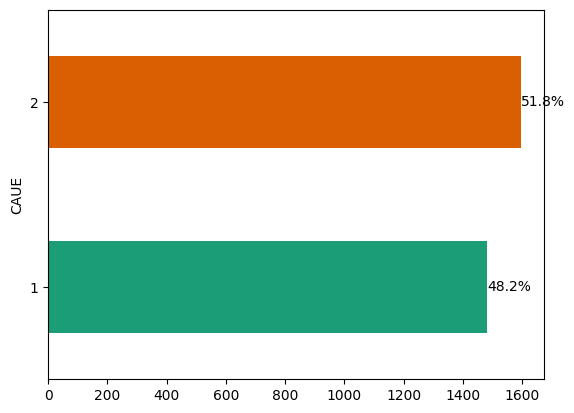

In [ ]:
# @title CAUE
import seaborn as sns

counts = df[df['CAUE']>0].groupby('CAUE').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

In [ ]:
df[['TiempoA', 'Tiempo1', 'Tiempo2', 'Tiempo3', 'Tiempo4']][1:].describe()

,TiempoA,Tiempo1,Tiempo2,Tiempo3,Tiempo4
count,3081.000000,3081.000000,3076.000000,3076.000000,3035.000000
mean,0.233223,0.098049,0.183269,0.223947,11.949283
std,0.238306,0.037411,0.092432,0.175943,3.283533
min,0.000278,0.000000,0.000833,0.000000,4.146944
25%,0.067500,0.083333,0.111389,0.096667,9.000000
50%,0.154722,0.100556,0.173889,0.179028,12.000000
75%,0.325278,0.121111,0.246181,0.306667,14.599028
max,2.262500,0.182778,0.559444,0.617778,21.076667


In [ ]:
df = pd.read_excel("Resultados_Simulacion.xlsx", sheet_name = "Simulacion1")
def limpiar_fecha(fecha):
    if pd.isna(fecha):
        return None
    fecha = re.sub(r'\s+a\.\s*m\.', ' AM', fecha)
    fecha = re.sub(r'\s+p\.\s*m\.', ' PM', fecha)
    return pd.to_datetime(fecha, format="%d/%m/%Y %I:%M:%S %p", errors='coerce')

# Convertir columnas de fecha a formato datetime
cols_fecha = ["Hora Arribo", "TPF1", "TP2", "TPF2", "TP3", "TPF3", "TP4", "TPF4"]
for col in cols_fecha:
    df[col] = df[col].apply(limpiar_fecha)

df["TiempoA"] = df["Hora Arribo"].diff().dt.total_seconds() / 3600
df["Tiempo1"] = (df["TPF1"] - df["Hora Arribo"]).dt.total_seconds() / 3600
df["Tiempo2"] = (df["TPF2"] - df["TPF1"]).dt.total_seconds() / 3600
df["Tiempo3"] = (df["TPF3"] - df["TPF2"]).dt.total_seconds() / 3600
df["Tiempo4"] = (df["TPF4"] - df["TPF3"]).dt.total_seconds() / 3600
tiempo_total_simulacion = 720
df[['TiempoA', 'Tiempo1', 'Tiempo2', 'Tiempo3', 'Tiempo4']][1:].describe()

,TiempoA,Tiempo1,Tiempo2,Tiempo3,Tiempo4
count,3081.000000,3081.000000,3076.000000,3076.000000,3035.000000
mean,0.233223,0.098049,0.183269,0.223947,11.949283
std,0.238306,0.037411,0.092432,0.175943,3.283533
min,0.000278,0.000000,0.000833,0.000000,4.146944
25%,0.067500,0.083333,0.111389,0.096667,9.000000
50%,0.154722,0.100556,0.173889,0.179028,12.000000
75%,0.325278,0.121111,0.246181,0.306667,14.599028
max,2.262500,0.182778,0.559444,0.617778,21.076667


In [ ]:
df = pd.read_excel("Resultados_Simulacion.xlsx", sheet_name = "ReasignacionBloquesCaso2")
def limpiar_fecha(fecha):
    if pd.isna(fecha):
        return None
    fecha = re.sub(r'\s+a\.\s*m\.', ' AM', fecha)
    fecha = re.sub(r'\s+p\.\s*m\.', ' PM', fecha)
    return pd.to_datetime(fecha, format="%d/%m/%Y %I:%M:%S %p", errors='coerce')

# Convertir columnas de fecha a formato datetime
cols_fecha = ["Hora Arribo", "TPF1", "TP2", "TPF2", "TP3", "TPF3", "TP4", "TPF4"]
for col in cols_fecha:
    df[col] = df[col].apply(limpiar_fecha)

df["TiempoA"] = df["Hora Arribo"].diff().dt.total_seconds() / 3600
df["Tiempo1"] = (df["TPF1"] - df["Hora Arribo"]).dt.total_seconds() / 3600
df["Tiempo2"] = (df["TPF2"] - df["TPF1"]).dt.total_seconds() / 3600
df["Tiempo3"] = (df["TPF3"] - df["TPF2"]).dt.total_seconds() / 3600
df["Tiempo4"] = (df["TPF4"] - df["TPF3"]).dt.total_seconds() / 3600
tiempo_total_simulacion = 720
df[['TiempoA', 'Tiempo1', 'Tiempo2', 'Tiempo3', 'Tiempo4']][1:].describe()

,TiempoA,Tiempo1,Tiempo2,Tiempo3,Tiempo4
count,3081.000000,3081.000000,3076.000000,3076.000000,3033.000000
mean,0.233223,0.096008,0.180506,0.223927,11.931473
std,0.238306,0.037128,0.095139,0.177073,3.278422
min,0.000278,0.000000,0.000833,0.000000,4.147222
25%,0.067500,0.081111,0.105278,0.096667,9.000000
50%,0.154722,0.099167,0.171389,0.176111,12.000000
75%,0.325278,0.118333,0.245625,0.306736,14.480000
max,2.262500,0.182778,0.581111,0.615833,21.076667


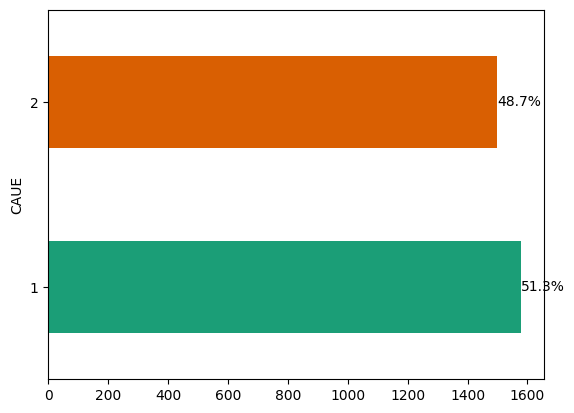

In [ ]:
# @title CAUE
import seaborn as sns

counts = df[df['CAUE']>0].groupby('CAUE').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

In [ ]:
df = pd.read_excel("Resultados_Simulacion.xlsx", sheet_name = "Caso3Anio1")
def limpiar_fecha(fecha):
    if pd.isna(fecha):
        return None
    fecha = re.sub(r'\s+a\.\s*m\.', ' AM', fecha)
    fecha = re.sub(r'\s+p\.\s*m\.', ' PM', fecha)
    return pd.to_datetime(fecha, format="%d/%m/%Y %I:%M:%S %p", errors='coerce')

# Convertir columnas de fecha a formato datetime
cols_fecha = ["Hora Arribo", "TPF1", "TP2", "TPF2", "TP3", "TPF3", "TP4", "TPF4"]
for col in cols_fecha:
    df[col] = df[col].apply(limpiar_fecha)

df["TiempoA"] = df["Hora Arribo"].diff().dt.total_seconds() / 3600
df["Tiempo1"] = (df["TPF1"] - df["Hora Arribo"]).dt.total_seconds() / 3600
df["Tiempo2"] = (df["TPF2"] - df["TPF1"]).dt.total_seconds() / 3600
df["Tiempo3"] = (df["TPF3"] - df["TPF2"]).dt.total_seconds() / 3600
df["Tiempo4"] = (df["TPF4"] - df["TPF3"]).dt.total_seconds() / 3600
tiempo_total_simulacion = 720
df[['TiempoA', 'Tiempo1', 'Tiempo2', 'Tiempo3', 'Tiempo4']][1:].describe()

,TiempoA,Tiempo1,Tiempo2,Tiempo3,Tiempo4
count,3081.000000,3081.000000,3081.000000,3081.000000,3040.000000
mean,0.233223,0.096379,0.181843,0.222956,11.943101
std,0.238306,0.037336,0.096291,0.175088,3.280214
min,0.000278,0.000000,0.000278,0.000000,4.147222
25%,0.067500,0.081944,0.108333,0.097500,9.000000
50%,0.154722,0.098889,0.170278,0.177778,12.000000
75%,0.325278,0.119167,0.245556,0.305833,14.567083
max,2.262500,0.181944,0.581111,0.621111,21.076667


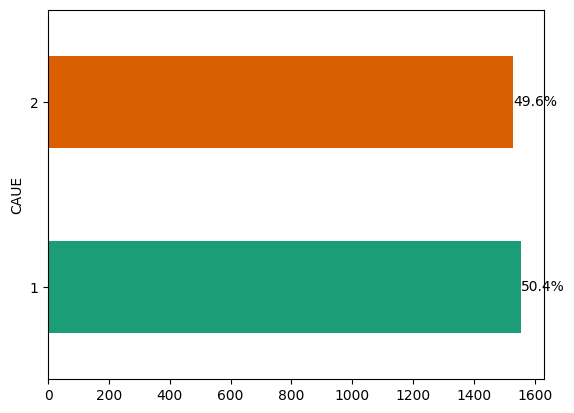

In [ ]:
# @title CAUE
import seaborn as sns

counts = df[df['CAUE']>0].groupby('CAUE').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

In [ ]:
df = pd.read_excel("Resultados_Simulacion.xlsx", sheet_name = "Caso3Anio2")
def limpiar_fecha(fecha):
    if pd.isna(fecha):
        return None
    fecha = re.sub(r'\s+a\.\s*m\.', ' AM', fecha)
    fecha = re.sub(r'\s+p\.\s*m\.', ' PM', fecha)
    return pd.to_datetime(fecha, format="%d/%m/%Y %I:%M:%S %p", errors='coerce')

# Convertir columnas de fecha a formato datetime
cols_fecha = ["Hora Arribo", "TPF1", "TP2", "TPF2", "TP3", "TPF3", "TP4", "TPF4"]
for col in cols_fecha:
    df[col] = df[col].apply(limpiar_fecha)

df["TiempoA"] = df["Hora Arribo"].diff().dt.total_seconds() / 3600
df["Tiempo1"] = (df["TPF1"] - df["Hora Arribo"]).dt.total_seconds() / 3600
df["Tiempo2"] = (df["TPF2"] - df["TPF1"]).dt.total_seconds() / 3600
df["Tiempo3"] = (df["TPF3"] - df["TPF2"]).dt.total_seconds() / 3600
df["Tiempo4"] = (df["TPF4"] - df["TPF3"]).dt.total_seconds() / 3600
tiempo_total_simulacion = 720
df[['TiempoA', 'Tiempo1', 'Tiempo2', 'Tiempo3', 'Tiempo4']][1:].describe()

,TiempoA,Tiempo1,Tiempo2,Tiempo3,Tiempo4
count,3081.000000,3081.000000,3081.000000,3081.000000,3042.000000
mean,0.233223,0.096339,0.183160,0.221344,11.927044
std,0.238306,0.037388,0.094146,0.174472,3.292821
min,0.000278,0.000000,0.000278,0.000000,4.823889
25%,0.067500,0.081389,0.111944,0.098056,9.000000
50%,0.154722,0.099167,0.174167,0.176389,12.000000
75%,0.325278,0.119722,0.248889,0.303611,14.615069
max,2.262500,0.180278,0.583333,0.620556,21.239167


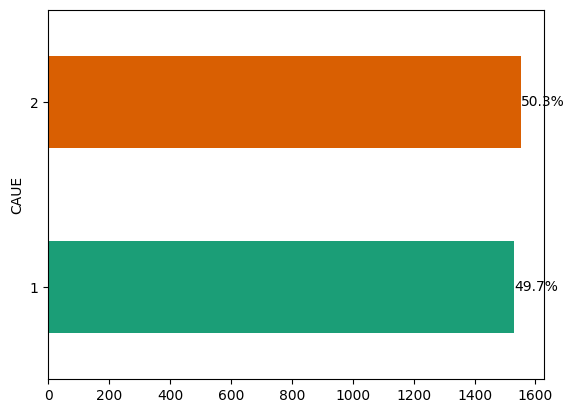

In [ ]:
# @title CAUE
import seaborn as sns

counts = df[df['CAUE']>0].groupby('CAUE').size()
percentages = counts / counts.sum() * 100
ax = counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
for i, (count, percentage) in enumerate(zip(counts, percentages)):
    ax.text(count + 0.5, i, f'{percentage:.1f}%', va='center', ha='left', color='black')

In [ ]:
resultados = []

# Iterar sobre cada tipo de recurso (ambulancias, bomberos, patrulleros)
for recurso in ["Amb", "Bomb", "Patr"]:
    # Obtener lista de servidores únicos en esa categoría
    servidores = df[recurso].dropna().unique()

    for servidor in servidores:
        filtro = df[df[recurso] == servidor]

        tiempo_total_servidor = filtro[['Tiempo2', 'Tiempo3','Tiempo4']].sum().sum()

        # Evitar división por cero
        if tiempo_total_simulacion == 0:
            continue

        # Calcular el porcentaje de ocupación
        ocupacion = tiempo_total_servidor / tiempo_total_simulacion

        # Calcular el porcentaje de ocio
        ocio = 1 - ocupacion

        # Guardar en la lista de resultados
        resultados.append({
            "Servidor": servidor,
            "Tipo": recurso,
            "Ocupación (%)": ocupacion * 100,
            "Ocio (%)": ocio * 100
        })

# Convertir resultados en un DataFrame
df_resultados = pd.DataFrame(resultados)

print(df_resultados)

   Servidor  Tipo  Ocupación (%)    Ocio (%)
0      MM11   Amb     297.998187 -197.998187
1      MA11   Amb     273.260957 -173.260957
2      MM24   Amb     293.111265 -193.111265
3      MM14   Amb     302.506597 -202.506597
4      MM12   Amb     243.894136 -143.894136
5      MM22   Amb     288.419830 -188.419830
6      MA21   Amb     240.532253 -140.532253
7      MM13   Amb     272.784992 -172.784992
8      MM21   Amb     296.493943 -196.493943
9      MM23   Amb     276.933218 -176.933218
10     BC21  Bomb     357.911998 -257.911998
11    BCG12  Bomb     100.453819   -0.453819
12    BCG22  Bomb      76.772608   23.227392
13     BC11  Bomb     363.948341 -263.948341
14     BC22  Bomb     383.330864 -283.330864
15     BC12  Bomb     354.862886 -254.862886
16    BCG21  Bomb      82.959954   17.040046
17    BCG11  Bomb      71.757793   28.242207
18     PP22  Patr     479.308025 -379.308025
19     PP11  Patr     444.732523 -344.732523
20     PP21  Patr     452.674846 -352.674846
21     PP1